### Tensorflow les bases

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
with tf.compat.v1.Session() as sess:
    
    a = tf.constant(2)
    
    b = tf.constant(10)
    
    c = tf.multiply(a, b)
    
    print(sess.run(c))

20


In [18]:
with tf.compat.v1.Session() as sess:
    w=tf.Variable(tf.ones((2,2,2)), name='Weight')
    i = tf.compat.v1.global_variables_initializer()
    sess.run(i)
    print(sess.run(w))

[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]


In [19]:
w.shape

TensorShape([2, 2, 2])

In [20]:
print(w)

<tf.Variable 'Weight_7:0' shape=(2, 2, 2) dtype=float32>


In [21]:
with tf.compat.v1.Session() as sess:
    x = tf.compat.v1.placeholder(tf.int32, name='x')
    c = 2*x
    print(sess.run(c, feed_dict={x:4}))

8


In [22]:
with tf.compat.v1.Session() as sess:
    input1 = tf.compat.v1.placeholder(tf.float32, shape=(1,2))
    input2 = tf.compat.v1.placeholder(tf.float32, shape=(2,1))
    output = tf.matmul(input1, input2)
    print(sess.run(output, feed_dict={input1:[[2, 3]], input2:[[1], [6]]}))

[[20.]]


In [23]:
with tf.compat.v1.Session() as sess:
    labels = np.array([1,2,3,0,2,1])
    result = tf.compat.v1.one_hot(labels, 4)
    print(sess.run(result))

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [7]:
with tf.compat.v1.Session() as sess:
    
    w=tf.Variable(0, dtype=tf.float32)
    cost = tf.add(w**2, tf.add(tf.multiply(-10.,w), 25))
    train = tf.compat.v1.train.GradientDescentOptimizer(0.055).minimize(cost)
    init= tf.compat.v1.global_variables_initializer()
    sess.run(init)
    
    for i in range(10000):
        sess.run(train)
    print(sess.run(w))

4.999998


# Multy layer perceptron apply for MNIST

In [8]:
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dense

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [55]:
input_shape=x_train.shape

In [56]:
model1 =  Sequential([keras.Input(shape=input_shape)])

In [57]:
model1.add(Dense(1024, activation='relu'))

In [58]:
model1.add(Dense(10, activation='softmax'))

In [59]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 60000, 1024)       803840    
                                                                 
 dense_13 (Dense)            (None, 60000, 10)         10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [60]:
from keras.utils import np_utils

In [61]:
batch_size = 100
nb_epochs = 5

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [62]:
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [63]:
history = model1.fit(x_train, y_train, batch_size, nb_epochs, verbose=1)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Zizu\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Zizu\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Zizu\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Zizu\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Zizu\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Zizu\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 60000, 784), found shape=(100, 784)


In [37]:
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0737 - accuracy: 0.9824
Test loss: 0.07369246333837509
Test accuracy: 0.9824000000953674


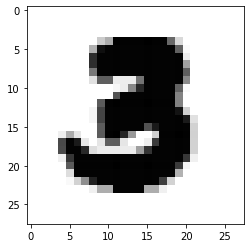

In [38]:
image_index =200

plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')

In [39]:
pred = model.predict(x_test)

In [40]:
np.argmax(pred[image_index])

3

In [41]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

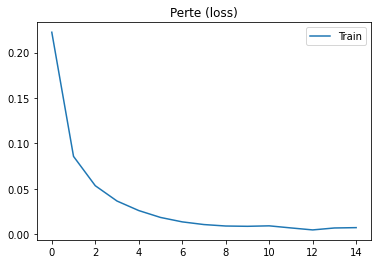

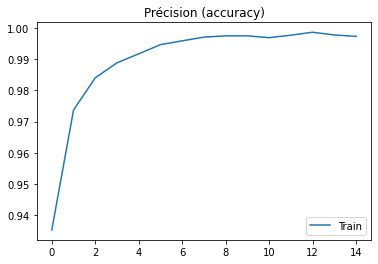

In [42]:
plt.plot(loss_curve, label="Train")
plt.legend(loc='upper right')
plt.title("Perte (loss)") 
plt.show()

plt.plot(acc_curve, label="Train")
plt.legend(loc='lower right')
plt.title("Précision (accuracy)") 
plt.show()

In [25]:
confusion_matrix(y_test, pred)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 1]

## with CNN Keras apply for MNIST dataset

In [3]:
# Paramètres de modèle / données
num_classes = 10
input_shape = (28, 28, 1)

# les données, réparties entre le train et les ensembles de test / base de données
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normaliser // Mettre les images à l'échelle dans la plage [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convertir les vecteurs de classe en matrices de classes binaires
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
model = keras.Sequential([keras.Input(shape=input_shape)])

In [6]:
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))

In [7]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [8]:
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))

In [9]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(layers.Flatten())

In [11]:
model.add(layers.Dropout(0.5))

In [12]:
model.add(layers.Dense(num_classes, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [14]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 98s 230ms/step - loss: 0.3649 - accuracy: 0.8897 - val_loss: 0.0825 - val_accuracy: 0.9780
Epoch 2/5
422/422 [==============================] - 71s 168ms/step - loss: 0.1124 - accuracy: 0.9655 - val_loss: 0.0559 - val_accuracy: 0.9858
Epoch 3/5
422/422 [==============================] - 70s 167ms/step - loss: 0.0853 - accuracy: 0.9743 - val_loss: 0.0460 - val_accuracy: 0.9878
Epoch 4/5
422/422 [==============================] - 90s 212ms/step - loss: 0.0702 - accuracy: 0.9781 - val_loss: 0.0427 - val_accuracy: 0.9873
Epoch 5/5
422/422 [==============================] - 83s 198ms/step - loss: 0.0631 - accuracy: 0.9799 - val_loss: 0.0395 - val_accuracy: 0.9887


In [18]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.0382 - accuracy: 0.9864
Test loss: 0.03823423013091087
Test accuracy: 0.9864000082015991


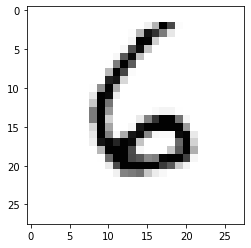

In [19]:
image_index =600
# image_index = 
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')

In [20]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

6


In [21]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

In [22]:
loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

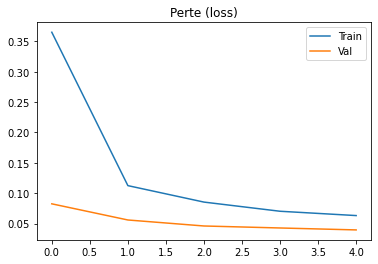

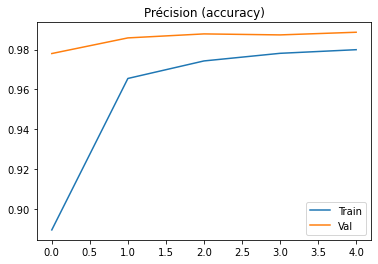

In [23]:
plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper right')
plt.title("Perte (loss)") 
plt.show()
plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='lower right')
plt.title("Précision (accuracy)") 
plt.show()

# aplly with convolution for CFAR10

In [131]:
(xtrain, ytrain),(xtest, ytest) = keras.datasets.cifar10.load_data()

In [132]:
print('\nx_train shape:', xtrain.shape, "\n")
print(xtrain.shape[0], 'train samples\n')
print(xtest.shape[0], 'test samples\n')


x_train shape: (50000, 32, 32, 3) 

50000 train samples

10000 test samples



In [124]:
img_rows = xtrain.shape[1]
img_cols = xtrain.shape[2]
colors = xtrain.shape[3]

In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0], img_rows, img_cols, colors)
xtest = xtest.reshape(xtest.shape[0], img_rows, img_cols, colors)

In [133]:
xtrain = xtrain/255
xtest = xtest/255

In [134]:
nbr_class = 10

In [135]:
ytrain = tf.keras.utils.to_categorical(ytrain, nbr_class)
ytest = tf.keras.utils.to_categorical(ytest, nbr_class)

In [136]:
xtrain.shape

(50000, 32, 32, 3)

In [150]:
input_shape = (32, 32, 3)
model = Sequential([keras.Input(shape=input_shape)])

In [151]:
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

In [152]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [153]:
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))

In [154]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [155]:
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))

In [156]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [157]:
model.add(layers.Flatten())

In [159]:
model.add(layers.Dropout(0.5))

In [160]:
model.add(layers.Dense(nbr_class, activation="softmax"))

In [161]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 2, 2, 128)      

In [162]:
batch_size = 128
epochs = 10

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="Adam", metrics=['accuracy'])

historyc = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/10
391/391 [==============================] - 134s 340ms/step - loss: 1.6330 - accuracy: 0.3975
Epoch 2/10
391/391 [==============================] - 118s 302ms/step - loss: 1.2496 - accuracy: 0.5548
Epoch 3/10
391/391 [==============================] - 164s 419ms/step - loss: 1.0832 - accuracy: 0.6176
Epoch 4/10
391/391 [==============================] - 184s 469ms/step - loss: 0.9712 - accuracy: 0.6569
Epoch 5/10
391/391 [==============================] - 115s 295ms/step - loss: 0.8914 - accuracy: 0.6875
Epoch 6/10
391/391 [==============================] - 122s 313ms/step - loss: 0.8187 - accuracy: 0.7149
Epoch 7/10
391/391 [==============================] - 115s 294ms/step - loss: 0.7601 - accuracy: 0.7326
Epoch 8/10
391/391 [==============================] - 116s 297ms/step - loss: 0.7078 - accuracy: 0.7528
Epoch 9/10
391/391 [==============================] - 139s 355ms/step - loss: 0.6591 - accuracy: 0.7699
Epoch 10/10
391/391 [==============================] - 149s 381m

In [1]:
image_index = 0
# image_index = 
plt.imshow(xtest[image_index].reshape(32, 32, 3))

NameError: name 'plt' is not defined